In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('data/005930.KS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,16060.0,16180.0,16000.0,16180.0,12509.083008,11950800
1,2010-01-05,16520.0,16580.0,16300.0,16440.0,12710.095703,27925850
2,2010-01-06,16580.0,16820.0,16520.0,16820.0,13003.881836,22948850
3,2010-01-07,16820.0,16820.0,16260.0,16260.0,12570.934570,22107950
4,2010-01-08,16400.0,16420.0,16120.0,16420.0,12694.631836,14777550
...,...,...,...,...,...,...,...
3344,2023-07-25,70000.0,70500.0,69800.0,70000.0,70000.000000,14314945
3345,2023-07-26,69800.0,70600.0,68100.0,69800.0,69800.000000,30016221
3346,2023-07-27,69900.0,71700.0,69300.0,71700.0,71700.000000,24261179
3347,2023-07-28,71800.0,72400.0,70100.0,70600.0,70600.000000,19420683


In [3]:
#날짜를 인덱스로 사용하기
df=df.set_index(pd.to_datetime(df['Date']))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3349 entries, 2010-01-04 to 2023-07-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3349 non-null   object 
 1   Open       3349 non-null   float64
 2   High       3349 non-null   float64
 3   Low        3349 non-null   float64
 4   Close      3349 non-null   float64
 5   Adj Close  3349 non-null   float64
 6   Volume     3349 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 209.3+ KB


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,2010-01-04,16060.0,16180.0,16000.0,16180.0,12509.083008,11950800
2010-01-05,2010-01-05,16520.0,16580.0,16300.0,16440.0,12710.095703,27925850
2010-01-06,2010-01-06,16580.0,16820.0,16520.0,16820.0,13003.881836,22948850
2010-01-07,2010-01-07,16820.0,16820.0,16260.0,16260.0,12570.934570,22107950
2010-01-08,2010-01-08,16400.0,16420.0,16120.0,16420.0,12694.631836,14777550
...,...,...,...,...,...,...,...
2023-07-25,2023-07-25,70000.0,70500.0,69800.0,70000.0,70000.000000,14314945
2023-07-26,2023-07-26,69800.0,70600.0,68100.0,69800.0,69800.000000,30016221
2023-07-27,2023-07-27,69900.0,71700.0,69300.0,71700.0,71700.000000,24261179


In [5]:
df=df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,11950800,12509.083008
2010-01-05,16520.0,16580.0,16300.0,16440.0,27925850,12710.095703
2010-01-06,16580.0,16820.0,16520.0,16820.0,22948850,13003.881836
2010-01-07,16820.0,16820.0,16260.0,16260.0,22107950,12570.934570
2010-01-08,16400.0,16420.0,16120.0,16420.0,14777550,12694.631836
...,...,...,...,...,...,...
2023-07-25,70000.0,70500.0,69800.0,70000.0,14314945,70000.000000
2023-07-26,69800.0,70600.0,68100.0,69800.0,30016221,69800.000000
2023-07-27,69900.0,71700.0,69300.0,71700.0,24261179,71700.000000


In [6]:
# 시퀀스 길이 7, 7개 데이터를 한개로
seq_length=7

batch=100

#데이터 역순
df1=df[::-1]
df1

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2023-07-31,70900.0,71000.0,69800.0,69800.0,13035420,69800.000000
2023-07-28,71800.0,72400.0,70100.0,70600.0,19420683,70600.000000
2023-07-27,69900.0,71700.0,69300.0,71700.0,24261179,71700.000000
2023-07-26,69800.0,70600.0,68100.0,69800.0,30016221,69800.000000
2023-07-25,70000.0,70500.0,69800.0,70000.0,14314945,70000.000000
...,...,...,...,...,...,...
2010-01-08,16400.0,16420.0,16120.0,16420.0,14777550,12694.631836
2010-01-07,16820.0,16820.0,16260.0,16260.0,22107950,12570.934570
2010-01-06,16580.0,16820.0,16520.0,16820.0,22948850,13003.881836


In [7]:
train_size=int(len(df1)*0.7)
train_set=df[0:train_size]
test_set=df[train_size-seq_length:]

In [8]:
print(train_set.shape, test_set.shape)

(2344, 6) (1012, 6)


In [9]:
train_set

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,11950800,12509.083008
2010-01-05,16520.0,16580.0,16300.0,16440.0,27925850,12710.095703
2010-01-06,16580.0,16820.0,16520.0,16820.0,22948850,13003.881836
2010-01-07,16820.0,16820.0,16260.0,16260.0,22107950,12570.934570
2010-01-08,16400.0,16420.0,16120.0,16420.0,14777550,12694.631836
...,...,...,...,...,...,...
2019-06-28,47000.0,47000.0,46700.0,47000.0,12949231,42027.500000
2019-07-01,47350.0,47400.0,46250.0,46600.0,11383522,41669.812500
2019-07-02,46200.0,46900.0,45850.0,46250.0,8463073,41356.851563


In [10]:
# input scale
scaler_x = MinMaxScaler()
scaler_x.fit(train_set.iloc[:,:-1])

train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])

# output scale
scaler_y = MinMaxScaler()
scaler_y.fit(train_set.iloc[:, [-1]])

train_set.iloc[:, -1] = scaler_y.transform(train_set.iloc[:, [-1]])
test_set.iloc[:, -1] = scaler_y.transform(test_set.iloc[:, [-1]]) 

C:\Users\admin\AppData\Local\Temp\ipykernel_3348\2906726426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.iloc[:, :-1] = scaler_x.transform(train_set.iloc[:, :-1])
C:\Users\admin\AppData\Local\Temp\ipykernel_3348\2906726426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.iloc[:, :-1] = scaler_x.transform(test_set.iloc[:, :-1])
C:\Users\admin\AppData\Local\Temp\ipykernel_3348\2906726426.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [11]:
test_set

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2019-06-26,-0.312169,-0.319855,-0.310232,-0.311767,0.142639,0.792523
2019-06-27,-0.312169,-0.319854,-0.310232,-0.311766,0.194856,0.819870
2019-06-28,-0.312169,-0.319854,-0.310232,-0.311766,0.200201,0.831719
2019-07-01,-0.312169,-0.319854,-0.310232,-0.311766,0.175994,0.822240
2019-07-02,-0.312169,-0.319854,-0.310232,-0.311766,0.130843,0.813946
...,...,...,...,...,...,...
2023-07-25,1.285258,1.297843,1.301016,1.292985,0.221315,1.573041
2023-07-26,1.280694,1.300138,1.261773,1.288400,0.464063,1.567740
2023-07-27,1.282976,1.325379,1.289474,1.331958,0.375088,1.618094


In [12]:
train_set

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,0.054313,0.051400,0.059095,0.059147,0.184764,0.049428
2010-01-05,0.064811,0.060578,0.066020,0.065108,0.431745,0.054755
2010-01-06,0.066180,0.066085,0.071099,0.073819,0.354799,0.062541
2010-01-07,0.071657,0.066085,0.065097,0.060981,0.341798,0.051067
2010-01-08,0.062072,0.056907,0.061865,0.064649,0.228467,0.054345
...,...,...,...,...,...,...
2019-06-28,-0.312169,-0.319854,-0.310232,-0.311766,0.200201,0.831719
2019-07-01,-0.312169,-0.319854,-0.310232,-0.311766,0.175994,0.822240
2019-07-02,-0.312169,-0.319854,-0.310232,-0.311766,0.130843,0.813946


In [13]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from  torch.utils.data import TensorDataset
from  torch.utils.data import DataLoader
import numpy as np

In [14]:
device='cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(125)
if device=='cuda':
    torch.cuda.manual_seed_all(125)

In [15]:
def build_dataset(time_series, seq_length):
    dataX=[]
    dataY=[]
    for i in range(0, len(time_series)-seq_length):
        x_=time_series[i:i+seq_length, :]
        y_=time_series[i+seq_length, [-1]]
        dataX.append(x_)
        dataY.append(y_)
    return np.array(dataX), np.array(dataY)

In [16]:
trainX, trainY=build_dataset(np.array(train_set), seq_length)
testX, testY=build_dataset(np.array(test_set), seq_length)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(2337, 7, 6) (2337, 1)
(1005, 7, 6) (1005, 1)


In [17]:
#텐서로 변환
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor=torch.FloatTensor(testX)
testY_tensor=torch.FloatTensor(testY)

print(trainX_tensor.size(), trainY_tensor.size())
print(testX_tensor.size(), testY_tensor.size())

torch.Size([2337, 7, 6]) torch.Size([2337, 1])
torch.Size([1005, 7, 6]) torch.Size([1005, 1])


In [18]:
train_dataset=TensorDataset(trainX_tensor, trainY_tensor)
train_loader=DataLoader(train_dataset, batch_size=batch, shuffle=False, drop_last=True)

In [19]:
data_dim=6
hidden_dim=10
output_dim=1
learning_rate=0.01
n_epochs=1000

In [20]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, seq_length, output_dim, layers):
        super(Net, self).__init__()
        
        self.hidden_dim=hidden_dim
        self.seq_length=seq_length
        self.output_dim=output_dim
        self.layers=layers
        
        self.lstm=nn.LSTM(input_dim, hidden_dim, 
                          num_layers=layers,
                          batch_first=True)
        self.fc=nn.Linear(hidden_dim, output_dim, bias=True)
        
    def reset_hidden_state(self):
        self.hidden=(
            torch.zeros(self.layers, self.seq_length, self.hidden_dim),
            torch.zeros(self.layers, self.seq_length, self.hidden_dim)
        )
        
    def forward(self, x):
        x, _status=self.lstm(x)
        x=self.fc(x[:, -1])
        return x

In [21]:
def train_model(model, train_df, num_epochos=None, lr=None, verbos=10, patience=10):
    criterion=nn.MSELoss().to(device)
    optimizer=optim.Adam(model.parameters(), lr=learning_rate)
    n_epochs=num_epochos
    
    train_hist=np.zeros(n_epochs)
    
    for epoch in range(n_epochs):
        avg_cost=0
        total_batch=len(train_df)
        
        for batch_idx, sample in enumerate(train_df):
            x_train, y_train=sample
            model.reset_hidden_state()
            
            outputs=model(x_train)
            loss=criterion(outputs, y_train)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            avg_cost+=loss/total_batch
            
        train_hist[epoch]=avg_cost
        
        if epoch % verbos==0:
            print('Epoch:', epoch, 'train loss:', avg_cost.item())
            
        if(epoch % patience==0) & (epoch !=0):
            if train_hist[epoch-patience] < train_hist[epoch]:
                print("\Early Stropping")
                break
    return model.eval(), train_hist

In [22]:
net=Net(data_dim, hidden_dim, seq_length, output_dim, 1).to(device)
model, train_hist=train_model(net, train_loader, num_epochos=n_epochs, 
                              lr=learning_rate, verbos=20, patience=50)

Epoch: 0 train loss: 0.031808383762836456


Epoch: 20 train loss: 0.0007882398786023259
Epoch: 40 train loss: 0.0004008937976323068
Epoch: 60 train loss: 0.00045021044206805527
Epoch: 80 train loss: 0.0008406316046603024
Epoch: 100 train loss: 0.0013698996044695377
\Early Stropping


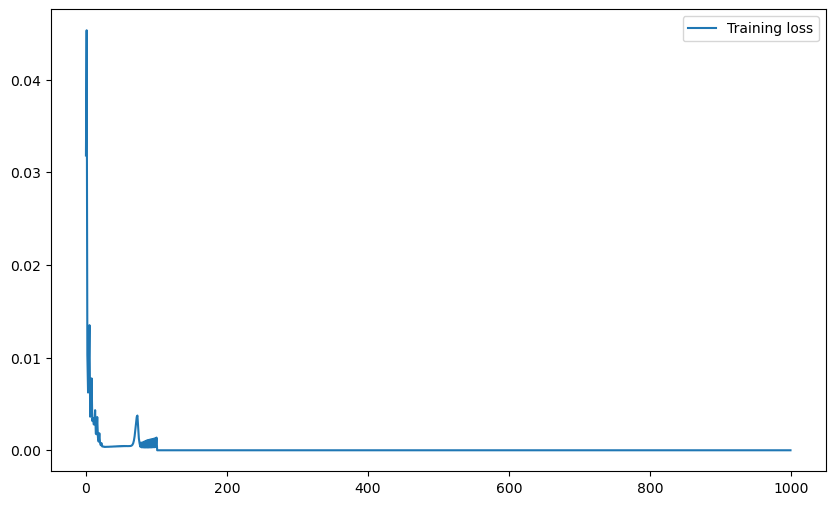

In [23]:
fig=plt.figure(figsize=(10, 6))
plt.plot(train_hist, label='Training loss')
plt.legend()
plt.show()

In [24]:

path='data/list_samsumg.pth'
torch.save(model.state_dict(), path)

In [25]:
model=Net(data_dim, hidden_dim, seq_length, output_dim, 1).to(device)
model.load_state_dict(torch.load(path), strict=False)
model.eval()

Net(
  (lstm): LSTM(6, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
with torch.no_grad():
    pred=[]
    for pr in range(len(testX_tensor)):
        model.reset_hidden_state()
        predicted=model(torch.unsqueeze(testX_tensor[pr],0))
        predicted=torch.flatten(predicted).item()
        pred.append(predicted)

    pred_inverse=scaler_y.inverse_transform(np.array(pred).reshape(-1, 1))
    testY_inverse=scaler_y.inverse_transform(testY_tensor)

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE:',MAE(pred_inverse, testY_inverse))

MAE SCORE: 12518.2629182878


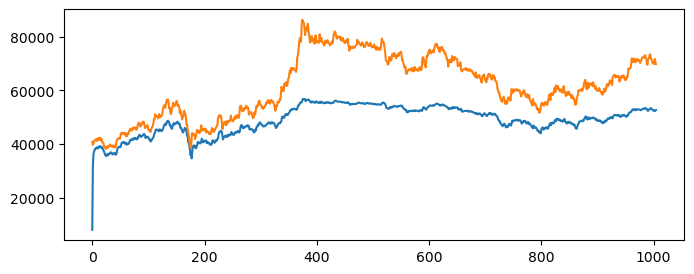

In [27]:
fig=plt.figure(figsize=(8,3))
plt.plot(np.arange(len(pred_inverse)), pred_inverse, label='pred')
plt.plot(np.arange(len(testY_inverse)), testY_inverse, label='true')
plt.show()